<a href="https://colab.research.google.com/github/cookieeyoung/Tableau-pj_team9/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/[태블로]실전프로젝트/onlinesales_final.csv')
df.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,쿠폰코드,할인율,할인금액,매출,수익,총 매출(배송비포함)
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,OFF10,10.0,0.205,2.05,1.845,8.55
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,SALE10,10.0,0.000,87.65,87.650,435.10
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,AIO10,10.0,1.650,16.50,14.850,435.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   고객ID         52924 non-null  object 
 1   거래ID         52924 non-null  object 
 2   거래날짜         52924 non-null  object 
 3   제품ID         52924 non-null  object 
 4   제품카테고리       52924 non-null  object 
 5   수량           52924 non-null  int64  
 6   평균금액         52924 non-null  float64
 7   배송료          52924 non-null  float64
 8   쿠폰상태         52924 non-null  object 
 9   성별           52924 non-null  object 
 10  고객지역         52924 non-null  object 
 11  가입기간         52924 non-null  int64  
 12  쿠폰코드         52924 non-null  object 
 13  할인율          52924 non-null  float64
 14  할인금액         52924 non-null  float64
 15  매출           52924 non-null  float64
 16  수익           52924 non-null  float64
 17  총 매출(배송비포함)  52924 non-null  float64
dtypes: float64(7), int64(2), object(9)
memory usag

In [ ]:
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df['거래날짜'].dtypes

dtype('<M8[ns]')

In [ ]:
df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric

,수량,평균금액,배송료,가입기간,할인율,할인금액,매출,수익,총 매출(배송비포함)
0,1,153.71,6.50,12,10.0,15.371,153.71,138.339,160.21
1,1,153.71,6.50,12,10.0,15.371,153.71,138.339,160.21
2,1,2.05,6.50,12,10.0,0.205,2.05,1.845,8.55
3,5,17.53,6.50,12,10.0,0.000,87.65,87.650,435.10
4,1,16.50,6.50,12,10.0,1.650,16.50,14.850,435.10
...,...,...,...,...,...,...,...,...,...
52919,1,121.30,6.50,45,30.0,0.000,121.30,121.300,127.80
52920,1,48.92,6.50,45,30.0,14.676,48.92,34.244,55.42
52921,1,151.88,6.50,45,30.0,45.564,151.88,106.316,158.38
52922,5,80.52,6.50,7,30.0,0.000,402.60,402.600,409.10


In [ ]:
df.describe()

,거래날짜,수량,평균금액,배송료,가입기간,할인율,할인금액,매출,수익,총 매출(배송비포함)
count,52924,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630,26.127995,19.802358,5.872052,88.254754,82.382703,238.833525
min,2019-01-01 00:00:00,1.000000,0.390000,0.000000,2.000000,0.000000,0.000000,0.400000,0.287000,4.120000
25%,2019-04-12 00:00:00,1.000000,5.700000,6.000000,15.000000,10.000000,0.000000,11.960000,10.872000,53.020000
50%,2019-07-13 00:00:00,1.000000,16.990000,6.000000,27.000000,20.000000,0.000000,30.390000,28.144000,125.500000
75%,2019-09-27 00:00:00,2.000000,102.130000,6.500000,37.000000,30.000000,1.902000,121.300000,119.000000,250.990000
max,2019-12-31 00:00:00,900.000000,355.740000,521.360000,50.000000,30.000000,2102.478000,10512.390000,8545.500000,16362.000000
std,NaN,20.104711,64.006882,19.475613,13.478285,8.278878,21.266244,163.993178,154.315592,617.564461


In [ ]:
# 총매출 계산
df['Sales'] = df['평균금액'] * df['수량']

# 연도별 최대 거래 날짜 계산
df['연도'] = df['거래날짜'].dt.year
max_order_date = df.groupby('연도')['거래날짜'].max().reset_index().rename(columns={'거래날짜': 'max_order_date_of_the_year'})
# 데이터에 추가
df = df.merge(max_order_date, on='연도')

# Recency 계산
df['Recency'] = (df['max_order_date_of_the_year'] - df.groupby(['고객ID', '연도'])['거래날짜'].transform('max')).dt.days + 1

# Frequency 계산 (고객별 연도별 고유 거래 횟수)
frequency_df = df.groupby(['고객ID', '연도'])['거래ID'].nunique().reset_index().rename(columns={'거래ID': 'Frequency'})

# Monetary 계산 (고객별 연도별 총 매출)
monetary_df = df.groupby(['거래ID','고객ID', '연도'])['Sales'].sum().reset_index().rename(columns={'Sales': 'Monetary'})

# RFM 데이터 병합
rfm_df = df[['고객ID', '연도']].drop_duplicates()
rfm_df = rfm_df.merge(frequency_df, on=['고객ID', '연도']).merge(monetary_df, on=['고객ID', '연도'])

# Recency 데이터 추가
rfm_df = rfm_df.merge(df[['고객ID', '연도', 'Recency']].drop_duplicates(), on=['고객ID', '연도'])


In [ ]:
df.tail()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,...,쿠폰코드,할인율,할인금액,매출,수익,총 매출(배송비포함),Sales,연도,max_order_date_of_the_year,Recency
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,...,ELEC30,30.0,0.000,121.30,121.300,127.80,121.30,2019,2019-12-31,1
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,...,SALE30,30.0,14.676,48.92,34.244,55.42,48.92,2019,2019-12-31,1
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,...,ELEC30,30.0,45.564,151.88,106.316,158.38,151.88,2019,2019-12-31,1
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,...,ELEC30,30.0,0.000,402.60,402.600,409.10,402.60,2019,2019-12-31,1
52923,USER_0562,Transaction_25060,2019-12-31,Product_0984,Nest-USA,4,80.52,19.99,Clicked,여,...,ELEC30,30.0,0.000,322.08,322.080,342.07,322.08,2019,2019-12-31,1


In [66]:
# 데이터의 마지막날 +1일을 기준으로 잡음
last = df['거래날짜'].max() + pd.DateOffset(days=1)

rfm_df = df.groupby(['고객ID']).agg({
    '거래날짜': lambda x: (last - x.max()).days,
    '거래ID': lambda x: x.nunique(),
    #'총 매출(배송비포함)': 'sum'#
    })

rfm_df.rename(columns={'거래날짜': 'Recency',
                        '거래ID': 'Frequency',
                        #'총 매출(배송비포함)': 'Monetary'
                       }, inplace=True)

rfm_df.reset_index(inplace=True)

rfm_df.head(20)

,고객ID,Recency,Frequency
0,USER_0000,108,1
1,USER_0001,60,31
2,USER_0002,74,8
3,USER_0003,18,11
4,USER_0004,108,13
5,USER_0005,131,3
6,USER_0006,190,44
7,USER_0007,25,5
8,USER_0008,41,37
9,USER_0009,100,39


In [67]:

rfm_df2 = df.groupby(['거래ID','고객ID']).agg({
    '총 매출(배송비포함)': 'sum'})

rfm_df2.rename(columns={
                         '총 매출(배송비포함)': 'Monetary'}, inplace=True)

rfm_df2.reset_index(inplace=True)

rfm_df2.head(20)

,거래ID,고객ID,Monetary
0,Transaction_0000,USER_1358,160.21
1,Transaction_0001,USER_1358,160.21
2,Transaction_0002,USER_1358,8.55
3,Transaction_0003,USER_0190,1073.96
4,Transaction_0003,USER_1358,2610.60
5,Transaction_0004,USER_0190,667.08
6,Transaction_0005,USER_0190,135.78
7,Transaction_0006,USER_0190,211.92
8,Transaction_0007,USER_0190,129.27
9,Transaction_0008,USER_0190,160.21


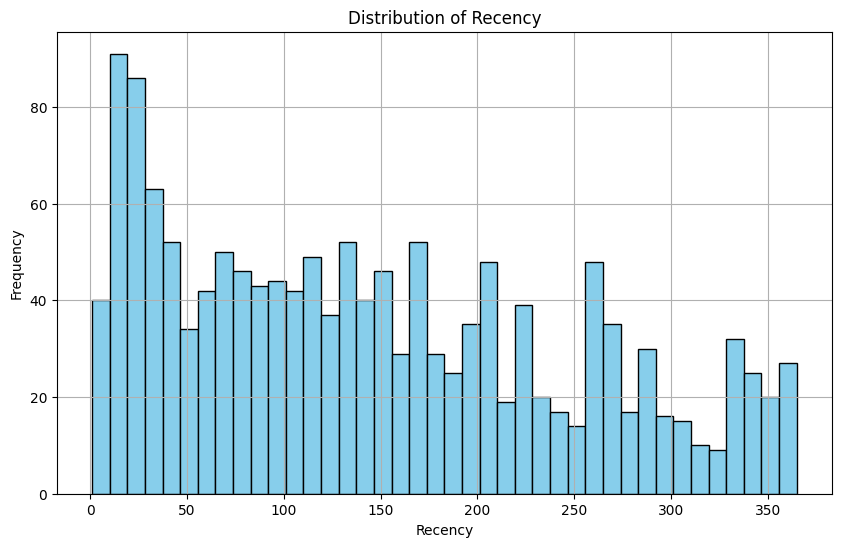

In [ ]:
# 전체 고객의 Recency 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['Recency'], bins=40, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
rfm_df['Recency'].describe()

,Recency
count,1468.000000
mean,145.292234
std,101.936959
min,1.000000
25%,56.000000
50%,132.000000
75%,221.000000
max,365.000000


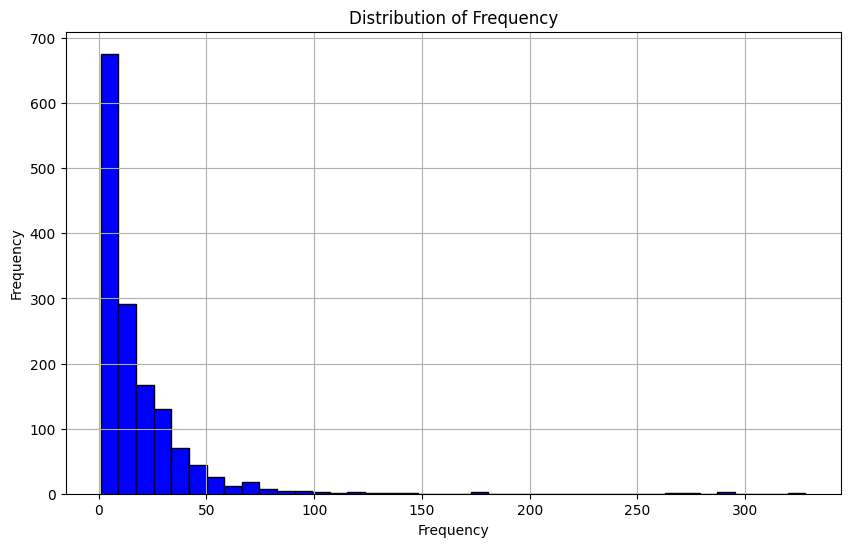

In [ ]:
# 전체 고객의 Frequency 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['Frequency'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
rfm_df['Frequency'].describe()

,Frequency
count,1468.000000
mean,18.141008
std,24.976414
min,1.000000
25%,5.000000
50%,11.000000
75%,23.000000
max,328.000000


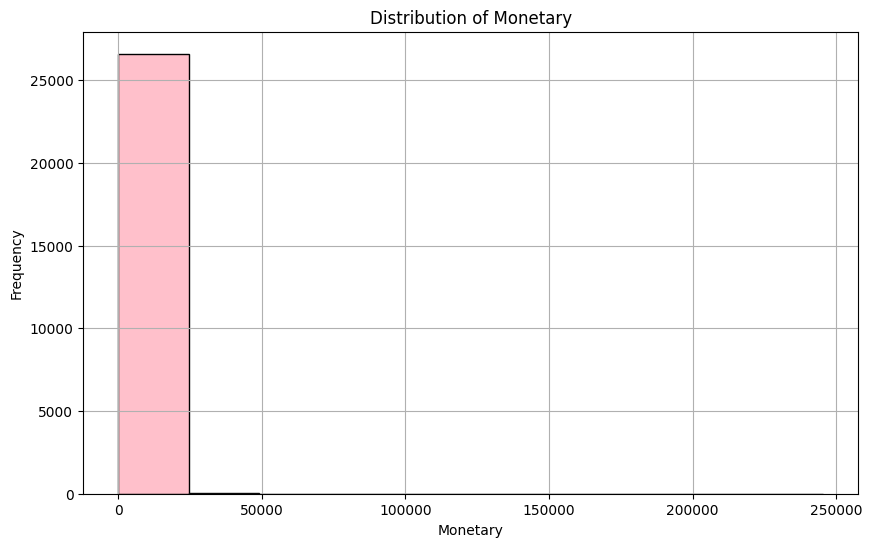

In [68]:
# 전체 고객의 Monetary 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(rfm_df2['Monetary'], bins=10, color='Pink', edgecolor='black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
rfm_df2['Monetary'].describe()

,Monetary
count,26631.000000
mean,474.635782
std,2778.971106
min,4.120000
25%,85.990000
50%,155.000000
75%,349.620000
max,245430.000000


In [ ]:
rfm_df2['Monetary'].value_counts()

,count
Monetary,
125.00,1387
155.00,1385
125.50,601
155.50,566
244.00,465
...,...
231.26,1
1778.76,1
1520.00,1


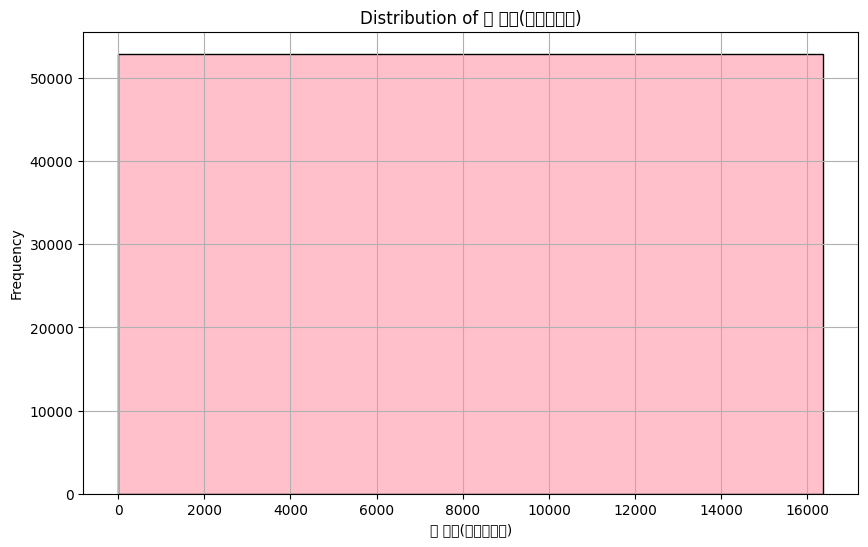

In [ ]:
# 전체 고객의 Monetary 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['총 매출(배송비포함)'], bins=1, color='Pink', edgecolor='black')
plt.title('Distribution of 총 매출(배송비포함)')
plt.xlabel('총 매출(배송비포함)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
df['총 매출(배송비포함)'].value_counts()

,count
총 매출(배송비포함),
125.00,1393
155.00,1385
244.00,667
125.50,601
155.50,566
...,...
361.48,1
86.14,1
119.62,1
